# FISH - Pipeline - A Python notebook to visualize FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Libraries

In [28]:
# Importing libraries
import sys
import pathlib
import warnings
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

import pandas as pd
import glob
import numpy as np
import math
warnings.filterwarnings("ignore")

### Path to source directories

In [29]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')

# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa

# Path to credentials
desktop_path = pathlib.Path.home()/'Desktop'
path_to_config_file = desktop_path.joinpath('config.yml')


----

# Parameters defined by the user 

----

### Paths to images

In [30]:
time_point = 'wo' # 'wo' '18min', '5h'
mandatory_substring='nuc_70__cyto_0__psfz_350__psfyx_160__ts_550_400'
connect_to_NAS = True

if time_point == 'wo':
    data_folder_path = pathlib.Path('smFISH_images/Linda_smFISH_images/Confocal/20220714/MS2-CY5_Cyto543_560_woStim')
    path_to_masks_dir = pathlib.Path('smFISH_images/Linda_smFISH_images/Confocal/20220714/MS2-CY5_Cyto543_560_woStim/masks_MS2-CY5_Cyto543_560_woStim___nuc_70__cyto_0.zip') 
    
if time_point == '18min':
    data_folder_path = pathlib.Path('smFISH_images/Linda_smFISH_images/Confocal/20220714/MS2-CY5_Cyto543_560_18minTPL_5uM')
    path_to_masks_dir = pathlib.Path('smFISH_images/Linda_smFISH_images/Confocal/20220714/MS2-CY5_Cyto543_560_18minTPL_5uM/masks_MS2-CY5_Cyto543_560_18minTPL_5uM___nuc_70__cyto_0.zip') 
    
if time_point == '5h':
    data_folder_path = pathlib.Path('smFISH_images/Linda_smFISH_images/Confocal/20220714/MS2-CY5_Cyto543_560_5hTPL_5uM')
    path_to_masks_dir = pathlib.Path('smFISH_images/Linda_smFISH_images/Confocal/20220714/MS2-CY5_Cyto543_560_5hTPL_5uM/masks_MS2-CY5_Cyto543_560_5hTPL_5uM___nuc_70__cyto_0.zip') 


In [31]:
%%capture
list_images, list_masks, dataframe, number_images, number_color_channels = fa.Utilities.extract_images_masks_dataframe( data_folder_path,path_to_masks_dir, mandatory_substring, path_to_config_file,connect_to_NAS)

In [32]:
#df_cells_with_TS = dataframe.loc[   (dataframe['cell_id']==cell_id)]
min_ts_size = 100
df_tests = dataframe[['cell_id','cluster_size','spot_type']]
df_tests= df_tests.loc[   (df_tests['cluster_size']>=min_ts_size)]
df_tests

,cell_id,cluster_size,spot_type
8254,25,104,0
22512,60,117,1
31647,99,135,0
35367,99,142,1
40257,118,164,0
41267,122,115,0
42040,118,128,1
43154,127,111,0


In [33]:
# Select the cell to visualize

#cell_id = 118 # TS

#cell_id = 0 # normal
#cell_id = 5 # orange
#cell_id = 6 # orange

#cell_id = 148 # normal
#cell_id = 150 # orange
#cell_id = 146 # green

cell_id = 62 # orange
#cell_id = 7 # orange

scaling_value_radius_cell = 1.5
# Extracting image with cell and specific dataframe
subsection_image_with_selected_cell, df_spots = fa.Utilities.image_cell_selection(cell_id=cell_id, list_images=list_images, dataframe=dataframe,scaling_value_radius_cell=scaling_value_radius_cell)

cell located in image_id:  4


In [34]:
df_test = dataframe.loc[   (dataframe['cell_id']==cell_id)]
print(df_test['is_cell_fragmented'])

20374    0
20375    0
20376    0
20377    0
20378    0
        ..
22882    0
22883    0
22884    0
22885    0
22886    0
Name: is_cell_fragmented, Length: 203, dtype: int64


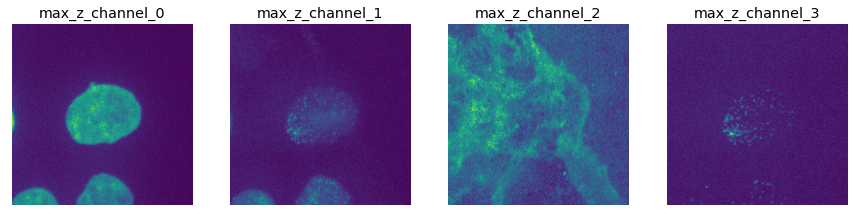

In [35]:
# Plot maximum projection
_, axes = plt.subplots(nrows = 1, ncols = number_color_channels, figsize = (15, 5))
for i in range(0, number_color_channels):
    axes[i].imshow( np.max(subsection_image_with_selected_cell[:,: ,:,i],axis=0))
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title('max_z_channel_'+str(i) )

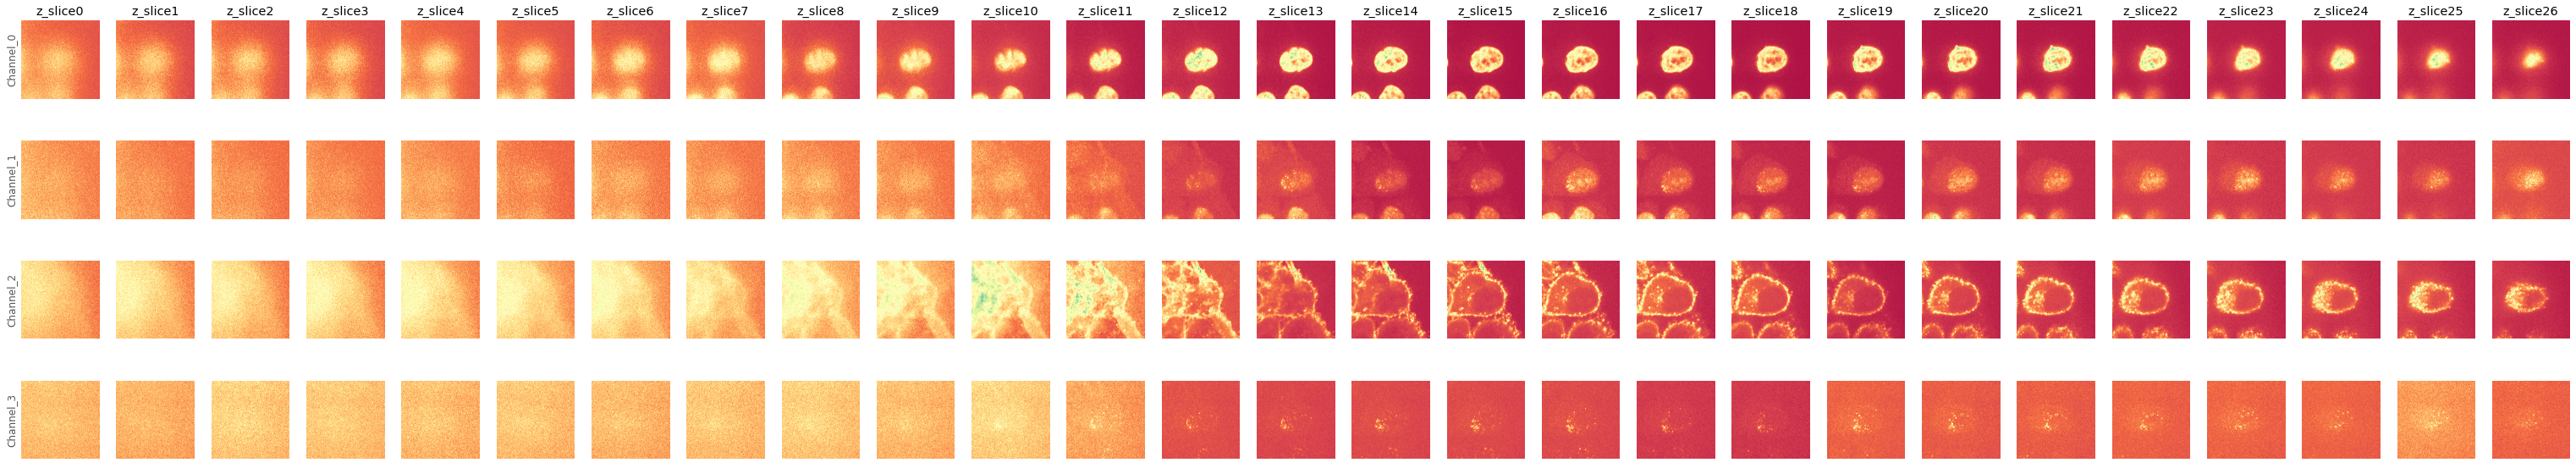

In [36]:
# Plot all z_slices
number_z_slices = subsection_image_with_selected_cell.shape[0]
_, axes = plt.subplots(nrows = number_color_channels , ncols = number_z_slices, figsize = ( number_z_slices*2, 10 ))
for i in range(0, number_z_slices):
    for j in range(0, number_color_channels):
        axes[j,i].imshow( subsection_image_with_selected_cell[i,: ,:,j],cmap='Spectral')
        axes[j,i].grid(False)
        axes[j,i].set_xticks([])
        axes[j,i].set_yticks([])
        if i ==0:
            axes[j,i].set_ylabel('Channel_'+str(j) )
        if j == 0:
            axes[j,i].set_title('z_slice'+str(i) )

In [37]:
#df_spots

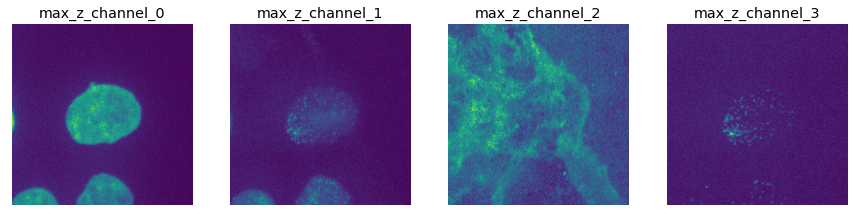

In [38]:
# Plot maximum projection
_, axes = plt.subplots(nrows = 1, ncols = number_color_channels, figsize = (15, 5))
for i in range(0, number_color_channels):
    axes[i].imshow( np.max(subsection_image_with_selected_cell[:,: ,:,i],axis=0))
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title('max_z_channel_'+str(i) )

In [39]:
max_subsection_image_with_selected_cell = np.max(subsection_image_with_selected_cell[:,: ,:,:],axis=0)
subsection_image_with_selected_cell_int8 = fa.Utilities.convert_to_int8(max_subsection_image_with_selected_cell, rescale=True, min_percentile=1, max_percentile=99.9)
print(subsection_image_with_selected_cell_int8.shape)

(240, 240, 4)


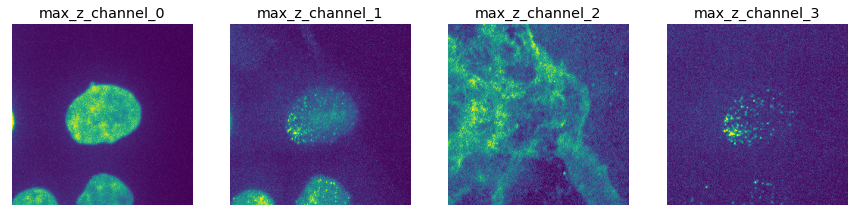

In [40]:
# Plot maximum projection
_, axes = plt.subplots(nrows = 1, ncols = number_color_channels, figsize = (15, 5))
for i in range(0, number_color_channels):
    axes[i].imshow( subsection_image_with_selected_cell_int8[:,:,i])
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title('max_z_channel_'+str(i) )

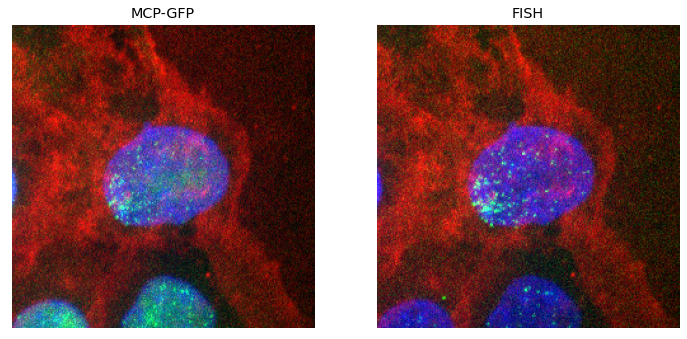

In [41]:
# Plot maximum projection
_, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 12))

axes[0].imshow( subsection_image_with_selected_cell_int8[:,:,[2,1,0]])
axes[0].grid(False)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('MCP-GFP' )

axes[1].imshow( subsection_image_with_selected_cell_int8[:,:,[2,3,0]])
axes[1].grid(False)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('FISH' )
plt.show()

In [42]:
video_filtered = fa.GaussianFilter(video=subsection_image_with_selected_cell, sigma = 1).apply_filter()
max_video_filtered = np.max(video_filtered,axis=0)
video_filtered_int8 = fa.Utilities.convert_to_int8(max_video_filtered, rescale=True, min_percentile=0, max_percentile=99.5)

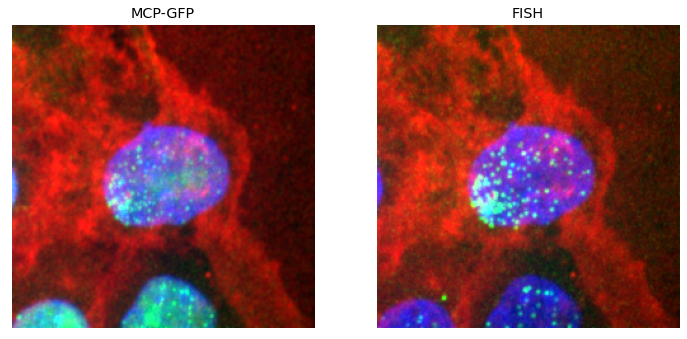

In [43]:
# Plot maximum projection
_, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 12))
axes[0].imshow( video_filtered_int8[:,:,[2,1,0]])
axes[0].grid(False)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('MCP-GFP' )

axes[1].imshow( video_filtered_int8[:,:,[2,3,0]])
axes[1].grid(False)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title('FISH' )
plt.show()

In [44]:
# Plotting a complete image
microns_per_pixel = 0.16

In [45]:
def plot_fov(selected_image, use_GaussianFilter=True):
    #selected_image = 1 #11
    df_selected_cell = dataframe.loc[   (dataframe['image_id']==selected_image)]
    if use_GaussianFilter == True:
        video_filtered = fa.GaussianFilter(video=list_images[selected_image], sigma = 1).apply_filter()
        max_complete_image = np.max(video_filtered,axis=0)
    else:
        max_complete_image = np.max(list_images[selected_image],axis=0)
    max_complete_image_int8 = fa.Utilities.convert_to_int8(max_complete_image, rescale=True, min_percentile=10, max_percentile=99.5)    
    # Plot maximum projection
    _, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 15))
    axes[0].imshow( max_complete_image_int8[:,:,[2,1,0]])
    axes[0].grid(False)
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_title('MCP-GFP' )
    scalebar = ScaleBar(dx = microns_per_pixel, units= 'um', length_fraction=0.25,location='lower right',box_color='k',color='w')
    axes[0].add_artist(scalebar)
    moving_scale =40 # This parameter moves the label position.
    cell_ids_labels = np.unique(df_selected_cell.loc[ :,'cell_id'].values)
    for _, label in enumerate(cell_ids_labels):
        cell_idx_string = str(label)
        Y_cell_location = df_selected_cell.loc[df_selected_cell['cell_id'] == label, 'nuc_loc_y'].values[0]-moving_scale
        X_cell_location = df_selected_cell.loc[df_selected_cell['cell_id'] == label, 'nuc_loc_x'].values[0]
        if X_cell_location>moving_scale:
            X_cell_location = X_cell_location-moving_scale   
        axes[0].text(x=X_cell_location, y=Y_cell_location, s=cell_idx_string, fontsize=12, color='w')
    axes[1].imshow( max_complete_image_int8[:,:,[2,3,0]])
    axes[1].grid(False)
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].set_title('FISH')
    scalebar = ScaleBar(dx = microns_per_pixel, units= 'um', length_fraction=0.25,location='lower right',box_color='k',color='w')
    axes[1].add_artist(scalebar)
    cell_ids_labels = np.unique(df_selected_cell.loc[ :,'cell_id'].values)
    for _, label in enumerate(cell_ids_labels):
        cell_idx_string = str(label)
        Y_cell_location = df_selected_cell.loc[df_selected_cell['cell_id'] == label, 'nuc_loc_y'].values[0]-moving_scale
        X_cell_location = df_selected_cell.loc[df_selected_cell['cell_id'] == label, 'nuc_loc_x'].values[0]
        if X_cell_location>moving_scale:
            X_cell_location = X_cell_location-moving_scale   
        axes[1].text(x=X_cell_location, y=Y_cell_location, s=cell_idx_string, fontsize=12, color='w')
    image_name = 'fov_'+str(selected_image)+'.png' 
    plt.savefig(image_name, transparent=False,dpi=1200, bbox_inches = 'tight', format='png')
    plt.close()

In [46]:
#for i in range(len(list_images)):
#    plot_fov(selected_image=i)